# Data Preprocessing and Machine Learning Models

This part focuses on the Data Preprocessing and the Machine Learning Models.


In [4]:
# Import important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


Mounted at /content/drive
/content/drive/My Drive


# Data Preprocessing

Data Preprocessing goals:

- Drop the first column which is an index.
- Handle any missing values.
- Convert categorical variables using Label Encoding.
- Split the data into features (X) and target (y).
- Split these into training and testing sets.

In [5]:
stroke_data = pd.read_csv('stroke_data_cleaned.csv')

#stroke_data = pd.read_csv('../data/cleaned/stroke_data_cleaned.csv')

# Quick look at the dataset
stroke_data.head()

# Drop the 'Unnamed: 0' column as it's just an index
stroke_data.drop(columns=['Unnamed: 0'], inplace=True)

# Check the values for 'smoking_status' and 'smoking status_status_imp'
#if equal delete the imputed
are_equal = stroke_data['smoking_status'].equals(stroke_data['smoking_status_imp'])

# Drop the imputed column
stroke_data.drop("smoking_status_imp",axis=1,inplace=True)

# Check for any remaining missing values
missing_values = stroke_data.isnull().sum()
stroke_data

# Fill missing values in 'bmi' with the imputed values in 'bmi_imp'
stroke_data['bmi'].fillna(stroke_data['bmi_imp'], inplace=True)
are_equal_1 = stroke_data['bmi'].equals(stroke_data['bmi_imp'])

# Drop the imputed column
stroke_data.drop("bmi_imp",axis=1,inplace=True)

stroke_data.isna().sum()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
rounded_age          0
dtype: int64

The first column was removed because we don't need it for the model. There were missing values in the 'bmi' column and were filled with imputed values. As a result we get our cleaned data set without missing values.

It is obvious that our data set contains many categorical variables and in the following we will encode these.

In [6]:
# Avoid introducing spurious ordinality, so better use onehot
#encoder for encoding the variables

# Define the columns to encode with one hot encoder
end_col_onehot = ["gender", "smoking_status", "work_type"]
# Initialize a new dataset, profit later visible
dataset_encoded = stroke_data
encoded_columns=[]

for col in end_col_onehot:
  one_hot = pd.get_dummies(dataset_encoded[col], prefix = col)
  dataset_encoded = dataset_encoded.drop(col, axis=1)
  dataset_encoded = dataset_encoded.join(one_hot)
  #save the names of the encoded columns (useful later for decoding)
  encoded_columns.extend(one_hot.columns.tolist())

# Drop the unencoded columns
dataset_encoded = dataset_encoded.iloc[:,1:]
# Dataset encoded is a separate dataset because we have to save the encoded
# Variables separately in order to decode them as well later...

# Encode with Label Encoder the binary variables ( with only 2 entries)
from sklearn.preprocessing import LabelEncoder
# Define cols
enc_col_le = ["ever_married", "Residence_type"]
label_encoder = LabelEncoder()
# Iterate through cols
for col in enc_col_le:
   dataset_encoded[col] = label_encoder.fit_transform(dataset_encoded[col])

# Assuming dataset_encoded is your DataFrame
for col in dataset_encoded.columns:
    if dataset_encoded[col].dtype == bool:
        dataset_encoded[col] = dataset_encoded[col].astype(int)

# Ever married : 1 yes 0 no .. residence type urban 1, 0 rural
dataset_encoded.columns

# View dataset
dataset_encoded

#save the dataset for StreamLit purposes
#dataset_encoded.to_csv('../data/cleaned/dataset_encoded.csv', index=False)

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,rounded_age,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,1,1,228.69,36.6,1,67.0,0,1,0,0,1,0,0,0,0,1,0,0
1,0,0,1,0,202.21,28.1,1,61.0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,1,1,0,105.92,32.5,1,80.0,0,1,0,0,0,1,0,0,0,1,0,0
3,0,0,1,1,171.23,34.4,1,49.0,1,0,0,0,0,0,1,0,0,1,0,0
4,1,0,1,0,174.12,24.0,1,79.0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,1,83.75,28.1,0,80.0,1,0,0,0,0,1,0,0,0,1,0,0
5106,0,0,1,1,125.20,40.0,0,81.0,1,0,0,0,0,1,0,0,0,0,1,0
5107,0,0,1,0,82.99,30.6,0,35.0,1,0,0,0,0,1,0,0,0,0,1,0
5108,0,0,1,0,166.29,25.6,0,51.0,0,1,0,0,1,0,0,0,0,1,0,0


OneHotEncoder and LabelEncoder were used as encoding techniques because of the levels of categories present in the data. Specifically for non-binary categories to avoid spurious ordinality or even introduction of bias OneHoteEncoder was used over LabelEncoding, where for each category of the specific variable (column) a new separate column was created. This way, we also avoided the risk that the models later don't interpret the numerical labels as ordinal values and learn relationships based on the assigned numerical values which leads to incorrect assumptions about the relationships between categories. With a for loop the boolean values were transformed in integers. For columns with binary data (only two) we used the normal LabelEncoding as visible in the code above.

# Model Training

This section concentrates on model training. Three different Models are trained:
- Decision Tree
- Random Forest
- Support Vector Machines
- Logistical Regression


After the training, the models will be evaluated using various metrics, such as accuracy, precision, recall, ROC, precision and F1-score as part of the classification report.
Due to the big imbalace in the data set, we will use the oversamling technique of SMOTE later. Our goal is to see how will the models perform before and after oversampling. Therefore, the training part is divided in two parts; first we train the models without SMOTE and after we train the models on the oversampled data set, in order to see the difference. The evaluation metrics are commented below.

In [7]:
print('No Stroke:',
      round(dataset_encoded['stroke'].value_counts()[0] / len(dataset_encoded) * 100, 2),
      '% are negative cases')
print('Stroke:',
      round(dataset_encoded['stroke'].value_counts()[1] / len(dataset_encoded) * 100, 2),
      '% are positive cases')

No Stroke: 95.13 % are negative cases
Stroke: 4.87 % are positive cases


Before addressing the class imbalance, we calucate the percentage of occurences for each class within the original dataset.

## Training data set and training functions



The standard training/test data split of 80/20 is used.

Since we want to compare the performance of different models at a later point, we considered scaling the data. Additionally, standardization makes the data less sensistive to outliers and will help our models to converge faster and provide more efficiency.

In [8]:
# Divide the training data
X = dataset_encoded.drop(['stroke'], axis=1)  # features
y = dataset_encoded['stroke']  # target

# Split the data again into training and testing sets (80/20 split)
# we use the stratisfy parameter to make sure that we have a similar distribution
# among the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Standardizing(scaling) the data
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)


The ML training procedure is based on four functions overall;

1) we have the standard training function where we fit the split datasets into the four models we want to train.

2) we have an additional function which saves the trained data for each model into a separate dictionary. This function is later needed for our StreamLit application.

3) we have a function which evaluates the previously mentioned metrics for model evaluation and cross validation.

4) we have a ploting function to better visualize the metric scores.

In the code every function is separately described.

Besides these functions, there are also two other functions that assess cross-validation. That part of the code uses 10-fold cross-validation to determine which model performs best on the training dataset and if this aligns with the final model evaluation later.

In [9]:
# Define training function
def train_models(models, X_train, y_train):
    """
    Trains multiple classification models.

    Input parameters:
    - models: list of list of tupels containing the model name and instances,
    - X_train: training data with the feautres columns (variables)
    - y_train: training data with the target column (variable)

    Returns:
    - trained_models: Dictionary containing trained model instances.
    """

    trained_models = {}

    for model_name, model_instance in models:
        model = model_instance
        model.fit(X_train, y_train)
        trained_models[model_name] = model

    return trained_models

# Save the trained data for future predictions
def train_saving(models, trained_models, X_train, y_train):
    """
    Saves training data for multiple classification models.
    Needed for StreamLit later

    Input parameters:
    - models: List of ist of tupels containing the model name and instances,
    - trained_models: Function for training models
    - X_train: Training data with the feautres columns (variables)
    - y_train: Training data with the target column (variable)

    Returns:
    - trained_models: Dictionary containing trained model instances with saved training data.
    """
    # Save the training data for each model
    for model_name, trained_data in trained_models.items():
        trained_models[model_name] = {
            'model': trained_data['model'],
            'X_train': X_train,
            'y_train': y_train
        }

    return trained_models

# Model evaluation on testing data
def evaluate_models(models, trained_models,X_test, y_test):
    """
    Evaluates multiple classification models.

    Input parameters:
    - models: List of list of tupels containing the model name and instances,
    - trained_models: Function for training models
    - X_test: Testing data with the feautures columns (variables)
    - y_test: Testing data with the target column (variable)

    Returns:
    - results: List of evaluation results for each model.
    """

    results = []

    for model_name, model_instance in models:
        evaluation = []
        model = trained_models[model_name]

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
        cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix
        roc_sc = roc_auc_score(y_test, y_pred)  # ROC AUC Score
        precision = precision_score(y_test, y_pred)  # Precision Score
        recall = recall_score(y_test, y_pred)  # Recall Score
        f1 = f1_score(y_test, y_pred)  # F1 Score

        # Print evaluation metrics
        print(f"{model_name}:")
        print("Confusion Matrix:")
        print(cm)
        print('Accuracy Score:', accuracy_score(y_test, y_pred))
        print('ROC AUC Score: {:.2f}'.format(roc_sc))
        print('Precision: {:.2f}'.format(precision))
        print('Recall: {:.2f}'.format(recall))
        print('F1: {:.2f}'.format(f1))
        print('*'*20)

        # Append evaluation results to list
        evaluation.append(model_name)
        evaluation.append((accuracy_score(y_test, y_pred)))
        evaluation.append(roc_sc)
        evaluation.append(precision)
        evaluation.append(recall)
        evaluation.append(f1)
        results.append(evaluation)

    return results

# Plot a graphical representation of the metrics scores
def plot_evaluation_metrics(results):
    """
    Plots evaluation metrics for different models.

    Input parameters:
    - results: List of evaluation results we obtained for each model.
    """

    # Convert results to DataFrame for easier plotting
    df = pd.DataFrame(results, columns=['Model', 'Accuracy',
                                        'ROC AUC',
                                        'Precision', 'Recall', 'F1'])

    # Plot evaluation metrics
    fig, axes = plt.subplots(1, 5, figsize=(18, 10))
    metrics = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1']
    for i, metric in enumerate(metrics):
        ax = axes.flatten()[i]
        sns.barplot(x='Model', y=metric, data=df, ax=ax)
        ax.set_title(f'{metric}')
        ax.set_xticks(range(len(df['Model'])))
        ax.set_xticklabels(df['Model'], rotation=45, ha='right')
        ax.set_ylabel(metric)
        ax.set_xlabel('Model')
        ax.grid(alpha=0.99)
    plt.tight_layout()
    plt.show()



#Cross Validation on training data
def cross_validation(models, X, y, folds=10):
    """
    Perform cross-validation for multiple models.

    Parameters:
    - models: list of tuples containing model names and instances
    - X: feature matrix
    - y: target vector
    - folds: number of folds for cross-validation

    Returns:
    - cv_results: list containing cross-validation results for each model
    """

    cv_results = []

    for model_name, model_instance in models:
        # Perform cross-validation
        cv_scores_accuracy = cross_val_score(model_instance, X, y, cv=folds, scoring='accuracy')
        cv_scores_recall = cross_val_score(model_instance, X, y, cv=folds, scoring='recall')
        cv_scores_f1 = cross_val_score(model_instance, X, y, cv=folds, scoring='f1')

        cv_results.append({
            'Model': model_name,
            'Accuracy': {
                'Mean': np.mean(cv_scores_accuracy),
                'Std': np.std(cv_scores_accuracy),
                'Scores': cv_scores_accuracy
            },
            'Recall': {
                'Mean': np.mean(cv_scores_recall),
                'Std': np.std(cv_scores_recall),
                'Scores': cv_scores_recall
            },
            'F1': {
                'Mean': np.mean(cv_scores_f1),
                'Std': np.std(cv_scores_f1),
                'Scores': cv_scores_f1
            }
        })

    return cv_results

def plot_cv_results(cv_results):
    """
    Plots evaluation metrics for cross validation.

    Input parameters:
    - cv_results: List of cross validation results we obtained for each model.
    """

    for result in cv_results:
        model_name = result['Model']
        accuracy_mean = result['Accuracy']['Mean']
        recall_mean = result['Recall']['Mean']
        f1_mean = result['F1']['Mean']

        # Create subplots
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Plot Accuracy
        axes[0].bar(['Accuracy'], [accuracy_mean], color='blue', alpha=0.7)
        axes[0].set_title('Accuracy')
        axes[0].set_ylabel('Mean Accuracy')
        axes[0].set_ylim(0, 1)
        axes[0].text(x=0, y=accuracy_mean, s=f'{accuracy_mean:.2f}', ha='center', va='bottom')

        # Plot Recall
        axes[1].bar(['Recall'], [recall_mean], color='green', alpha=0.7)
        axes[1].set_title('Recall')
        axes[1].set_ylabel('Mean Recall')
        axes[1].set_ylim(0, 1)
        axes[1].text(x=0, y=recall_mean, s=f'{recall_mean:.2f}', ha='center', va='bottom')

        # Plot F1
        axes[2].bar(['F1'], [f1_mean], color='red', alpha=0.7)
        axes[2].set_title('F1')
        axes[2].set_ylabel('Mean F1 Score')
        axes[2].set_ylim(0, 1)
        axes[2].text(x=0, y=f1_mean, s=f'{f1_mean:.2f}', ha='center', va='bottom')

        # Set common title
        fig.suptitle(f'{model_name} - Cross Validation Results')

        # Adjust layout
        plt.tight_layout()
        plt.show()






## Choice of Evaluation Metrics



Starting point for our model evaluation were the two research questions we have proposed in the preliminary study. Considering the specific characterstics of our imbalanced and later oversampled dataset, to make the final decision on which model to chose was a challenging step.
As part of the model evaluation, although we include several metrics in our code, we have decided to focus on two key metrics: recall (sensitivity) and F1 score. To adress the question why we chose exactly these two we had the following reasons:
- Positive cases remain our focus: Recall(senstivity) specifically measures the proportion of true positive predictions (instances where the patient has had a stroke) among all actual positive cases in the dataset. . A high recall indicates that the model is good at catching instances of the condition it's trying to predict, which in the case of strokes, means identifying patients who are at risk. Given that our dataset is imbalanced, with stroke cases being the minority, recall allows us to evaluate the model's performance while focusing on these critical positive cases.

- Identifying a higher likelihood of stroke occurrence: The F1 score, being the harmonic mean or balanced value of precision and recall, provides a good trade-off between these two metrics for imbalanced datasets. In simpler words, The F1 score balances precision (the model's ability to only label as positive the samples that are actually positive) and recall, providing a measure of a test's accuracy that considers both false positives and false negatives. In contexts where both the costs of false positives and false negatives are high, the F1 score is especially useful. Furthermore, it tends to mitigate the potential presence of bias (which can be introduced later by SMOTE). By considering both precision and recall, the F1 score gives us an insight into the model's ability to capture positive cases while minimizing misclassifications.

Additionally, we included a confusion matrix to have a better representation on the count of the true and false positives.

We evaluate these metrics within the cross validation(on the training dataset) and model evaluation(on the testing dataset). This way, we are able to chose an appropriate model and make predctions based on it, which answers our first research quesiton: “How likely is the patient to have a stroke based on the various risk factors, such as gender, age,
work type, BMI, glucose levels or smoking status?”.

Our second question, "Which machine learning models have higher accuracy in predicting the likelihood of stroke occurrence?" is straightforward to address where we can simply compare different accuracy scores, but it presents challenges when dealing with predicting positive cases. This difficulty arises from the problem of imbalance, which we address by applying SMOTE. Consequently, we cannot rely solely on model accuracy as a metric. There are several reasons for this:

- SMOTE generates synthetic samples for the minority class, introducing some noise or uncertainty regarding the real-world distribution of the minority class. We have to remember that SMOTE doesn't provide us real-world data.

- If the model performs well on the majority class (not experiencing a stroke), it might achieve a higher accuracy, which can be misleading in our case where we want to predict how likely is the occurence of stroke.

Overall, we  consider other evaluation metrics such as F1 score (trade-off between precision and recall) and recall, as described above. These metrics provide a more comprehensive understanding of the model's performance, particularly in scenarios involving imbalanced datasets as ours.

### Training the original imbalanced class dataset

[{'Model': 'Logistic Regression', 'Accuracy': {'Mean': 0.7441350256484011, 'Std': 0.02264275712572634, 'Scores': array([0.68459658, 0.7603912 , 0.72860636, 0.76528117, 0.74327628,
       0.74327628, 0.75794621, 0.74572127, 0.76470588, 0.74754902])}, 'Recall': {'Mean': 0.8239473684210527, 'Std': 0.07541620434705225, 'Scores': array([0.85      , 0.8       , 0.85      , 0.9       , 0.75      ,
       0.95      , 0.7       , 0.9       , 0.78947368, 0.75      ])}, 'F1': {'Mean': 0.23911837684709245, 'Std': 0.019959456225843508, 'Scores': array([0.20858896, 0.24615385, 0.23448276, 0.27272727, 0.22222222,
       0.26573427, 0.22047244, 0.25714286, 0.23809524, 0.22556391])}}, {'Model': 'SVM', 'Accuracy': {'Mean': 0.7796095210700418, 'Std': 0.02314132732913223, 'Scores': array([0.74816626, 0.78728606, 0.74816626, 0.80684597, 0.76283619,
       0.75305623, 0.80195599, 0.78484108, 0.79411765, 0.80882353])}, 'Recall': {'Mean': 0.6381578947368421, 'Std': 0.06239950369147039, 'Scores': array([0.6   

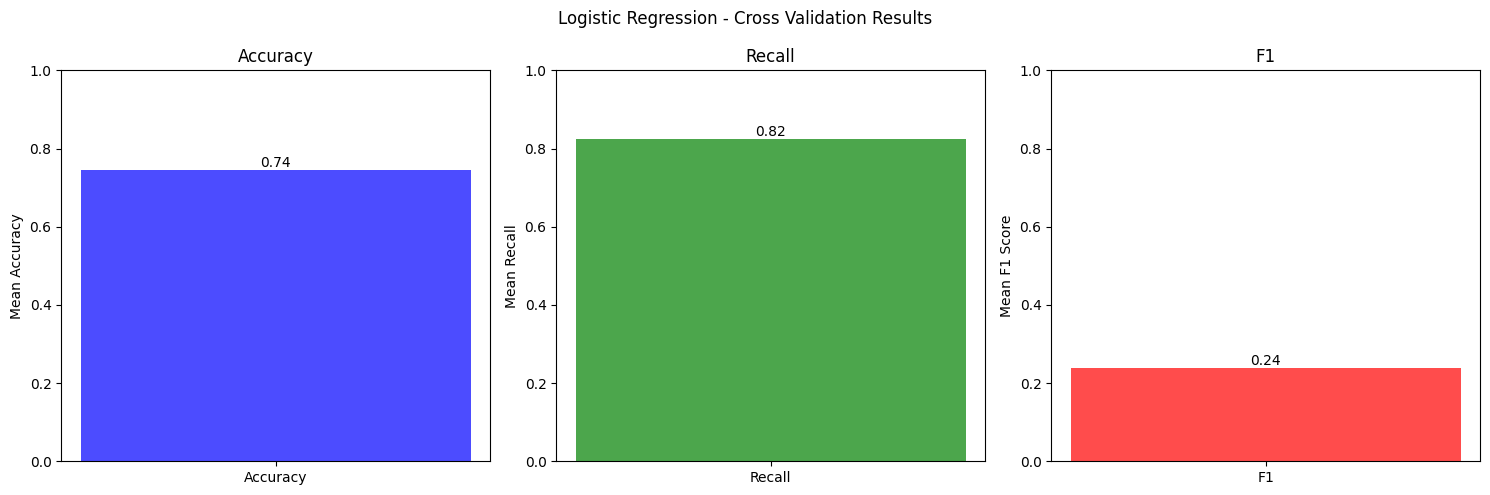

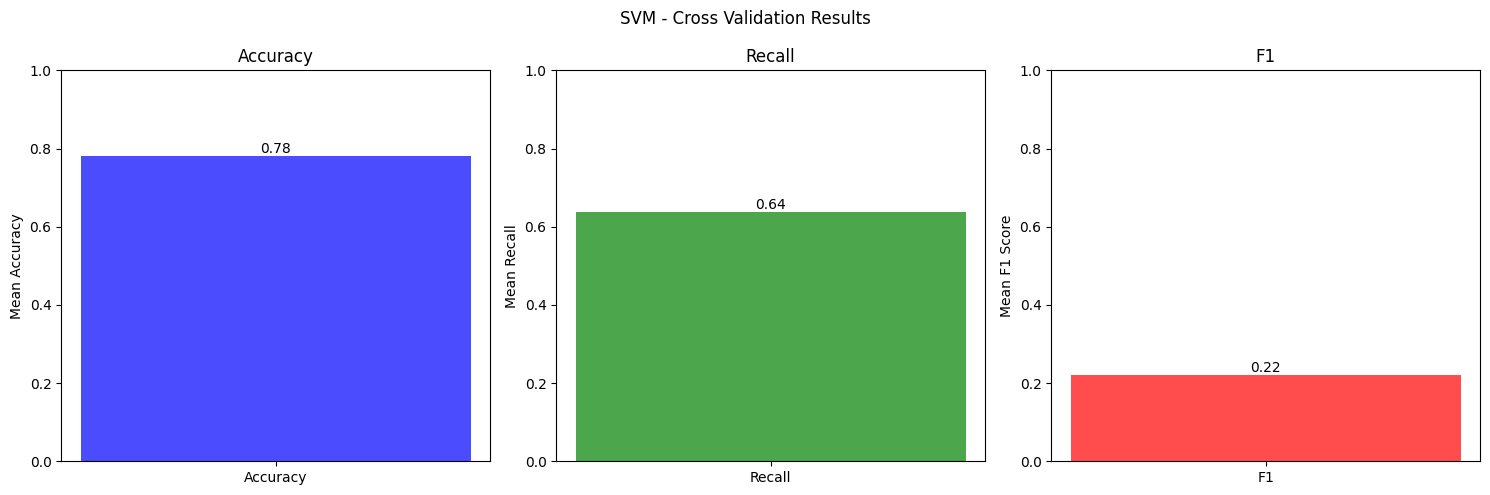

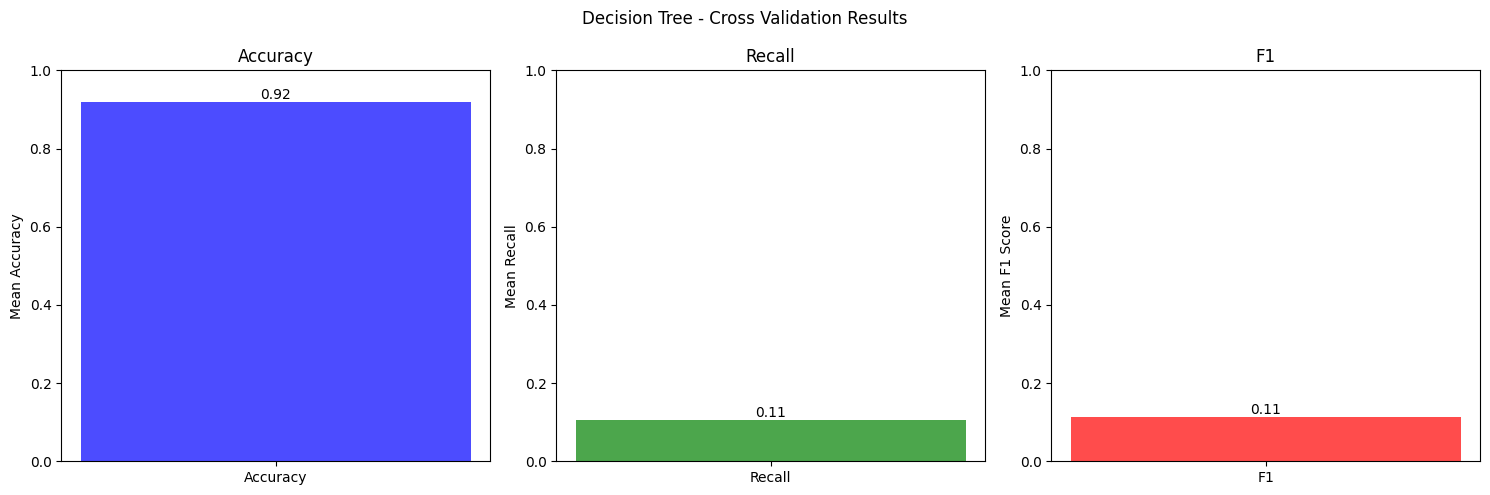

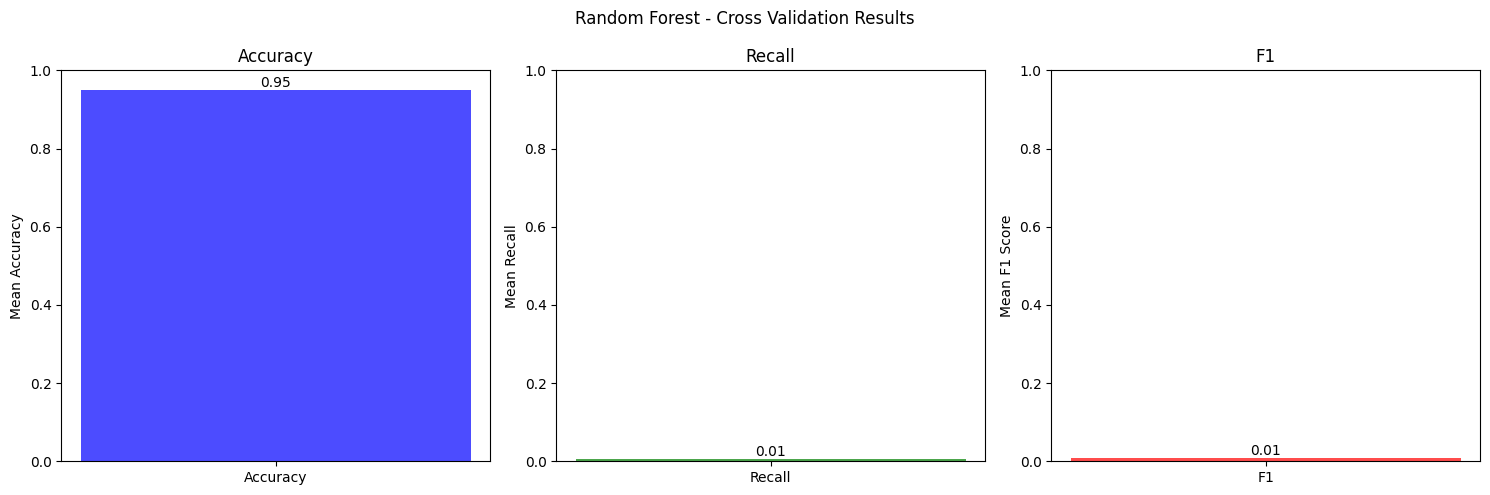

Logistic Regression:
Confusion Matrix:
[[724 248]
 [ 15  35]]
Accuracy Score: 0.7426614481409002
ROC AUC Score: 0.72
Precision: 0.12
Recall: 0.70
F1: 0.21
********************
SVM:
Confusion Matrix:
[[761 211]
 [ 27  23]]
Accuracy Score: 0.7671232876712328
ROC AUC Score: 0.62
Precision: 0.10
Recall: 0.46
F1: 0.16
********************
Decision Tree:
Confusion Matrix:
[[942  30]
 [ 47   3]]
Accuracy Score: 0.9246575342465754
ROC AUC Score: 0.51
Precision: 0.09
Recall: 0.06
F1: 0.07
********************
Random Forest:
Confusion Matrix:
[[971   1]
 [ 50   0]]
Accuracy Score: 0.9500978473581213
ROC AUC Score: 0.50
Precision: 0.00
Recall: 0.00
F1: 0.00
********************


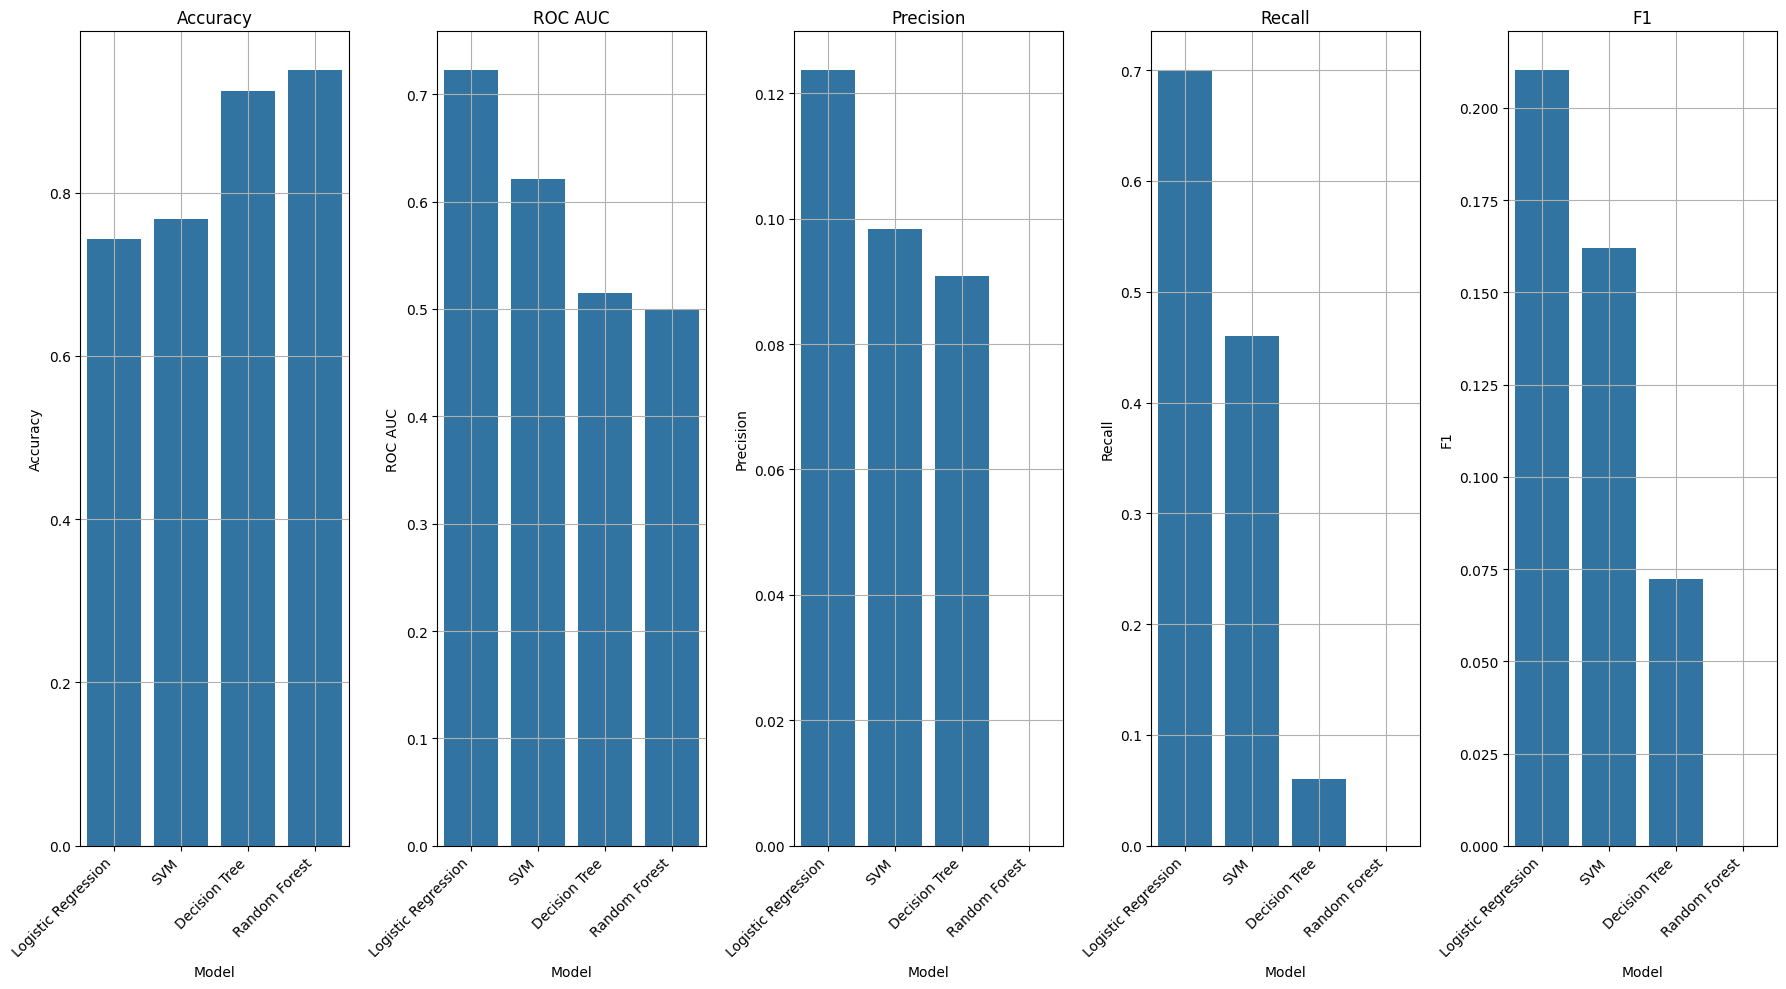

In [10]:
# Define the models
models = [
    ['Logistic Regression', LogisticRegression(random_state=0,max_iter=10000,class_weight='balanced')],
    ['SVM', SVC(random_state=0, class_weight = 'balanced')],
    ['Decision Tree', DecisionTreeClassifier(random_state=0, class_weight = 'balanced')],
    ['Random Forest', RandomForestClassifier(random_state=0, class_weight = 'balanced')],
]

# Cross Validation for accuracy, recall and f1 score
cv_results = cross_validation(models, X_train_std, y_train)
print(cv_results)

# Plot cross validation metrics
plot_cv_results(cv_results)

# Train models
trained_models = train_models(models, X_train_std, y_train)

# Evaluate models
evaluation_results = evaluate_models(models, trained_models, X_test_std, y_test)

# Plot the results
graphs = plot_evaluation_metrics(evaluation_results)


### Interpretation


#### Cross Validation results
At the beginning, we observe that in the original dataset, where we assess the original (still imbalanced) data set, the Random Forest Classifier has the highest accuracy in predicting the 'no stroke' cases but has a very poor recall and F1 score. The high accuracy is a result from the imbalanced classes, meaning that the model predicts the majority class most of the time and ignores the minority class, which is misleading in terms of performance. On the other hand, Logistic Regression and SVM tend to have the best recall and F1 score among all the models, although the accuracy tends to be lower compared to Random Forest.

As we clarified before, we will make our decision based on recall and F1 score because they focus on the minority class. Therefore, we expect that Logistic Regression and SVM should both perform well on the testing data.

#### Final Model Evaluation

The final model evaluation, as the code already reveals, is done on the testing data.
As the cross validation revealed before, Logistic Regression and SVM perform the best here. In recall and F1 score Logistic regression outperformed SVM, indicating that has the ability to correctly identify most positive cases out of all actual positive positive cases. SVM outperformed Logistic Regression only in accuracy but this might be misleading and therefore is irrelevant to judge.
Overall, Logistic Regression demonstates better performance.

Note: based on this decision we built our StreamLit App with Logistic Regression.


## SMOTE (Synthetic Minority Oversampling Technique)


To address the imbalance issue, we employed SMOTE, one of the most common oversampling methods. Here is a roughtly represantion on how it works;
it selects randomly samples from the minority class and identifies their k-nearest minority class neighbors and then it creates new samples along the line connecting each original sample to one of its neighbors, effectively synthesizing new instances (no copies) for the minority class.
By introducing the oversampled data into the training dataset, the class distribution becomes balanced. As a results, the classifier creates wider decision boundaries, reducing the risk of overfitting to the majority class.
To conclude, the reason we use SMOTE is twofold:
- No information loss: SMOTE enables us to retain valuable data from the minority class, preventing its loss during the training process.
- Overfitting mitigation:  We mitigate overfitting which may be caused by random oversampling

However, it's important to note a significant drawback: SMOTE doesn't consider neighboring examples, potentially leading to class overlap and introducing additional noise.

Data shapes before oversampling were (4088, 19) and (4088,)
Data shapes after oversampling are (7778, 19) and (7778,)
0    3889
1    3889
Name: stroke, dtype: int64


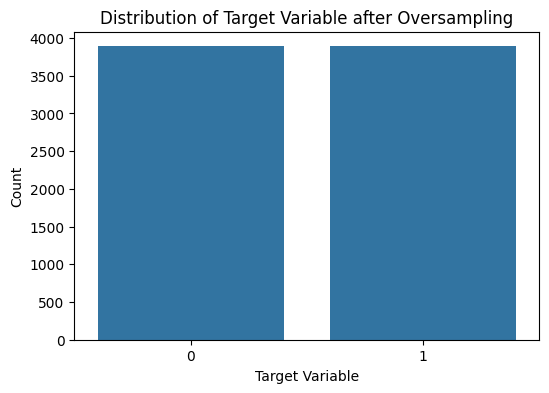

In [12]:
#it makes sense to apply smote because the data is biased and imbalanced which
#may cause biased models at the end which will fail to make accurate predictions

#initiation of smote
oversample = SMOTE(random_state=42, sampling_strategy=1)
#fit smote to training sample
X_res, y_res = oversample.fit_resample(X_train_std, y_train)
print('Data shapes before oversampling were {0} and {1}'.format(X_train_std.shape, y_train.shape))
print('Data shapes after oversampling are {0} and {1}'.format(X_res.shape, y_res.shape))
print(y_res.value_counts())

#distribution after oversampling
plt.figure(figsize=(6, 4))
sns.countplot(x=y_res)
plt.title('Distribution of Target Variable after Oversampling')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()




To make sure the classes are balanced we double check the number of positive and negative samples. We conclude that there are 3889 included samples per class.

[{'Model': 'Logistic Regression', 'Accuracy': {'Mean': 0.7989230876120337, 'Std': 0.0199856934928006, 'Scores': array([0.75449871, 0.79177378, 0.781491  , 0.8059126 , 0.80205656,
       0.79562982, 0.83161954, 0.80462725, 0.82110682, 0.8005148 ])}, 'Recall': {'Mean': 0.8475260382158852, 'Std': 0.02597950488001933, 'Scores': array([0.80976864, 0.80205656, 0.83804627, 0.84832905, 0.8714653 ,
       0.86375321, 0.88431877, 0.84575835, 0.87628866, 0.83547558])}, 'F1': {'Mean': 0.8081944342101102, 'Std': 0.019221114442541168, 'Scores': array([0.76735688, 0.79389313, 0.79318735, 0.81381011, 0.81490385,
       0.80866426, 0.84004884, 0.81234568, 0.83028083, 0.80745342])}}, {'Model': 'SVM', 'Accuracy': {'Mean': 0.8840329128246867, 'Std': 0.015243785346615212, 'Scores': array([0.8496144 , 0.88560411, 0.87275064, 0.90102828, 0.88817481,
       0.87917738, 0.90488432, 0.88303342, 0.8983269 , 0.87773488])}, 'Recall': {'Mean': 0.9442066626030264, 'Std': 0.022784320006694184, 'Scores': array([0.8868

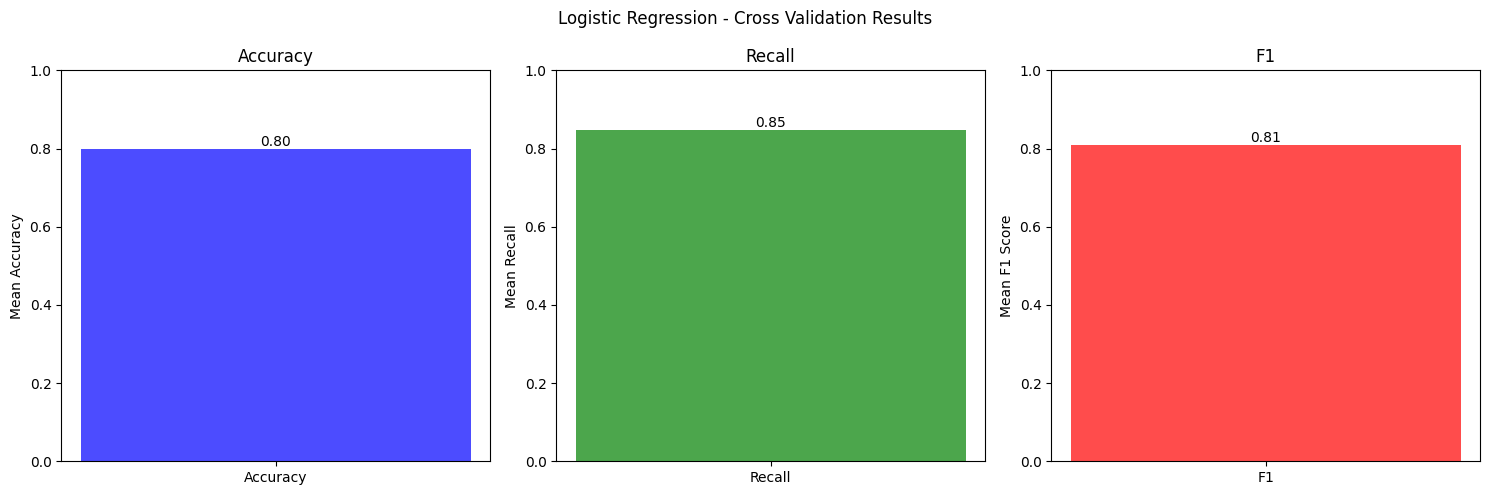

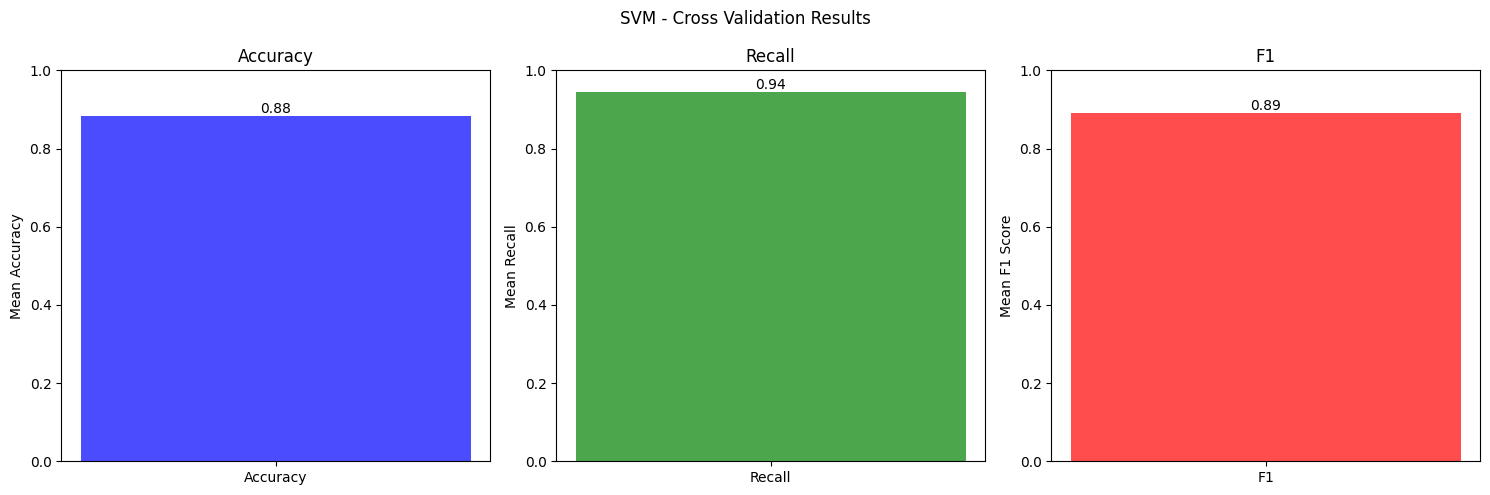

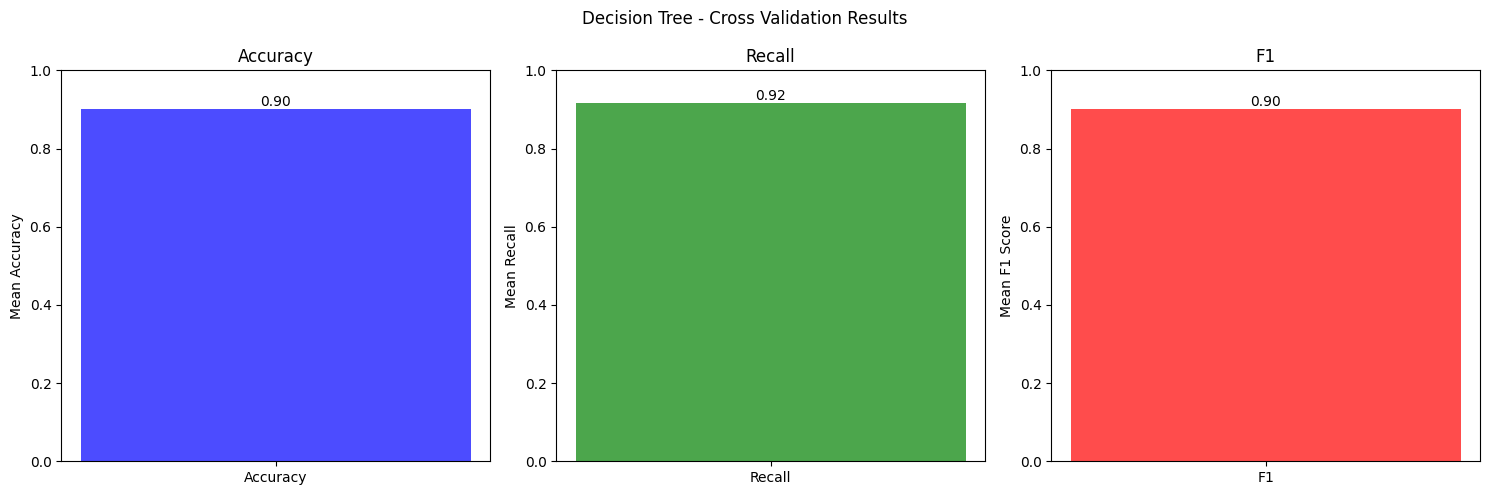

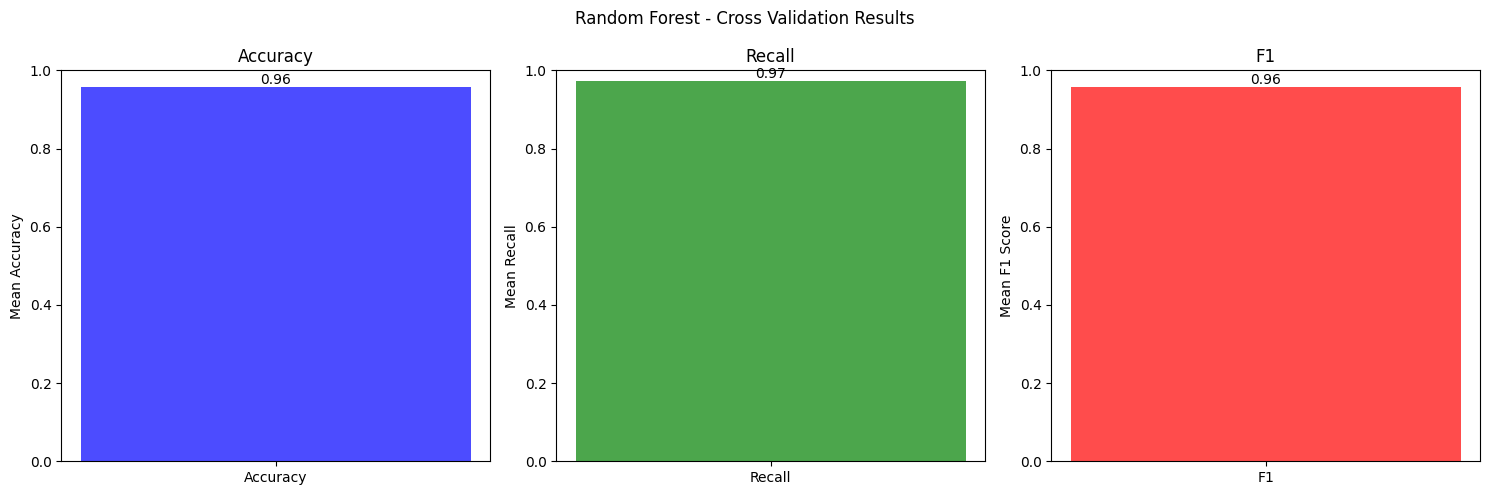

Logistic Regression:
Confusion Matrix:
[[730 242]
 [ 19  31]]
Accuracy Score: 0.7446183953033269
ROC AUC Score: 0.69
Precision: 0.11
Recall: 0.62
F1: 0.19
********************
SVM:
Confusion Matrix:
[[811 161]
 [ 31  19]]
Accuracy Score: 0.812133072407045
ROC AUC Score: 0.61
Precision: 0.11
Recall: 0.38
F1: 0.17
********************
Decision Tree:
Confusion Matrix:
[[894  78]
 [ 37  13]]
Accuracy Score: 0.8874755381604696
ROC AUC Score: 0.59
Precision: 0.14
Recall: 0.26
F1: 0.18
********************
Random Forest:
Confusion Matrix:
[[932  40]
 [ 45   5]]
Accuracy Score: 0.9168297455968689
ROC AUC Score: 0.53
Precision: 0.11
Recall: 0.10
F1: 0.11
********************


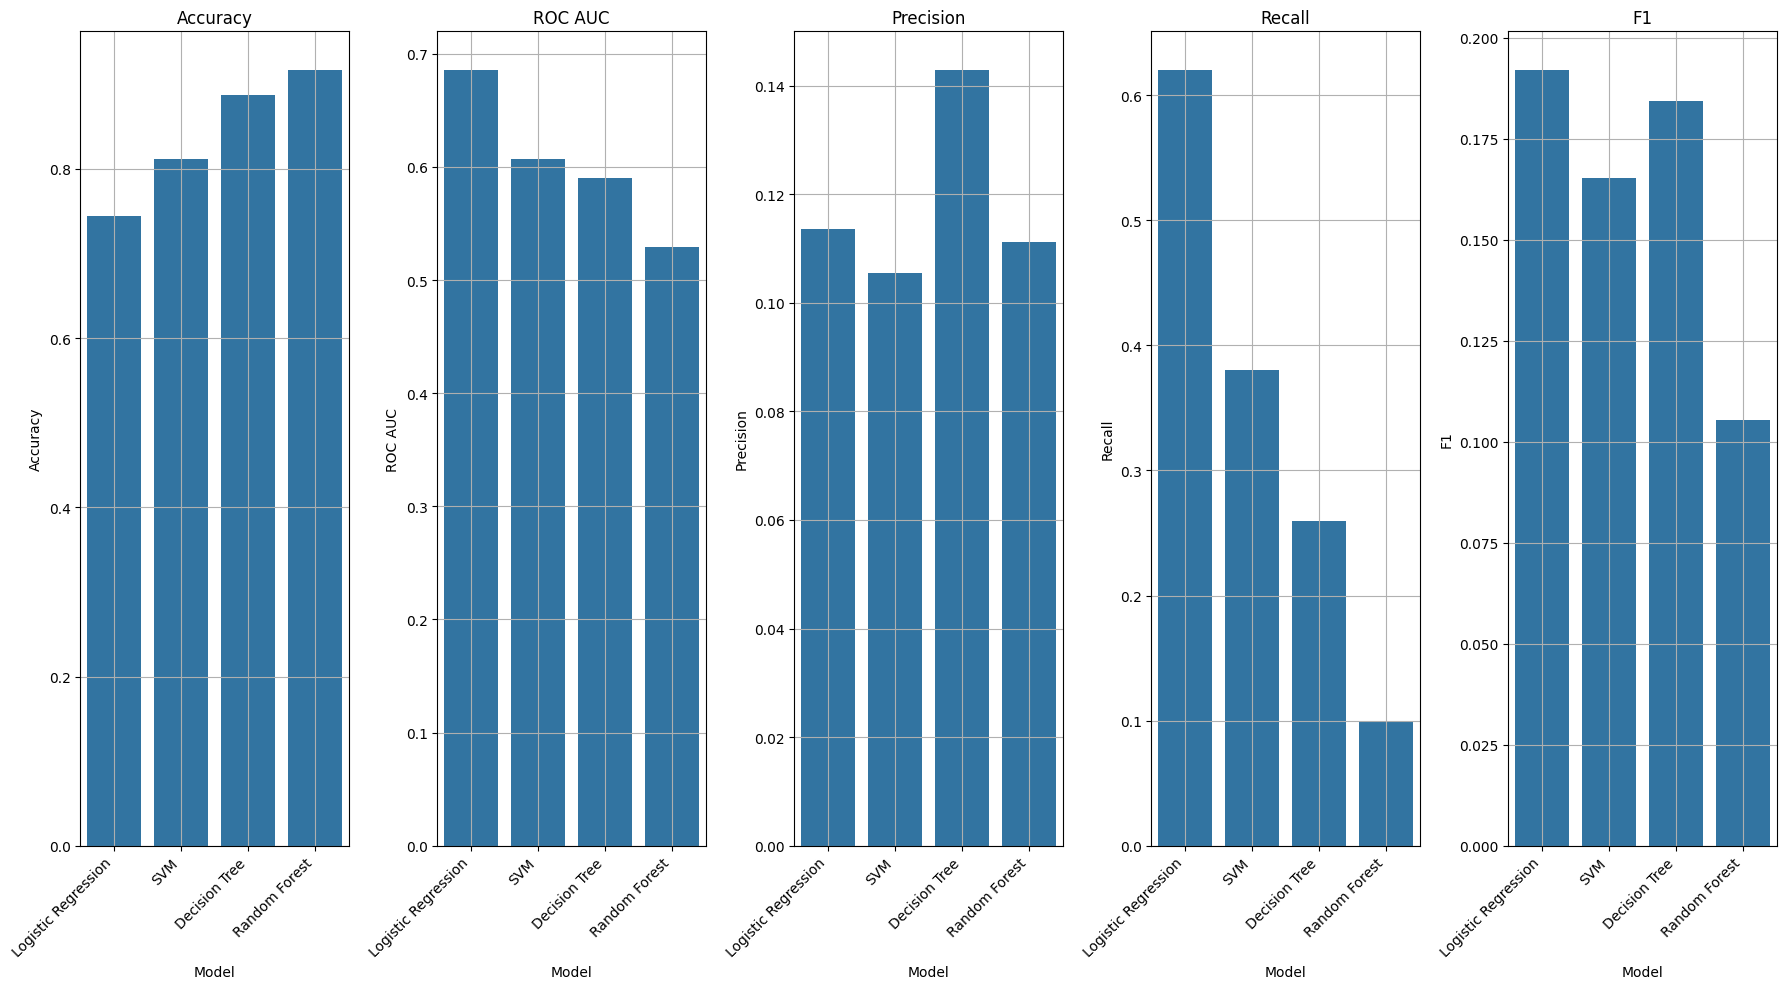

In [13]:
models_SMOTE = [
    ['Logistic Regression', LogisticRegression(random_state=0,max_iter=10000,class_weight='balanced')],
    ['SVM', SVC(random_state=0,class_weight='balanced')],
    ['Decision Tree', DecisionTreeClassifier(random_state=0, class_weight='balanced')],
    ['Random Forest', RandomForestClassifier(random_state=0, class_weight='balanced')],
]

# Cross Validation for accuracy, recall and f1 score
cv_results_SMOTE = cross_validation(models, X_res, y_res)
print(cv_results_SMOTE)

# Plotting cross validation metrics
plot_cv_results(cv_results_SMOTE)

# Train models
trained_models_SMOTE = train_models(models_SMOTE, X_res, y_res)

# Evaluate models
evaluation_results_SMOTE = evaluate_models(models_SMOTE, trained_models_SMOTE, X_test_std, y_test)

# Plot the results
graphs_SMOTE = plot_evaluation_metrics(evaluation_results_SMOTE)



### Interpretation

#### Cross Validation with SMOTE

There is very visible drastic improvement of the model performance for all models after applying SMOTE.

Random Forest outperformed the rest of the models, demonstrating highest recall and F1 score, which tend to be very low in the original dataset. Decison Tree behaved similarly, scoring the second highest mean results.

Logistic regression and SVM have a drastically improved recall and F1, but remain still the models with lowest accuracy. At this point, in order to make a statement which model performed the best, we have to look into the final MOdel Evaluation.

#### Final Model Evaluation

We saw that Random Forest shows the highest mean scores across accuracy, recall, and F1 in the cross validation results. However, in the confusion matrix for a specific test, its recall is notably low, considering our aim to prioritize recall. This suggests that while it's generally strong, it might not be as reliable for catching all positive stroke cases.

Decision Tree models have a slightly lower performance in cross validation metrics compared to Random Forest but show a better balance in the confusion matrix results, with a reasonable recall and the highest precision among the models.

SVM and Logistic Regression show lower performance metrics in cross-validation but might still be considered based on specific performance aspects such as recall or F1 in the context of the confusion matrix results.

Considering our research questions, a model with a higher recall is critical as missing a stroke case could have more severe consequences than falsely predicting a stroke. The Decision Tree model seems like a balanced choice, with a higher recall and reasonable F1 score compared to others, particularly in the context of predicting a critical condition like stroke. It captures a good balance between identifying positive cases and maintaining a reasonable level of precision.

However, the Random Forest model, despite its lower recall in the test confusion matrix, shows strong overall performance in cross-validation, suggesting that with proper tuning (such as adjusting the decision threshold or balancing the dataset), it could potentially offer the best of both worlds: high accuracy with a recall that's sufficiently high for medical predictions.


In [18]:
from sklearn.model_selection import GridSearchCV


tuning_models = [
    (LogisticRegression(), [{'C':[0.25, 0.5, 0.75, 1], 'random_state':[0]}]),
    (SVC(), [{'C':[0.25, 0.5, 0.75, 1], 'kernel':['linear', 'rbf'], 'random_state':[0]}]),
    (DecisionTreeClassifier(), [{'criterion':['gini', 'entropy'], 'random_state':[0]}]),
    (RandomForestClassifier(), [{'n_estimators':[100, 150, 200], 'criterion':['gini', 'entropy'], 'random_state':[0]}])
]


for model, params in tuning_models:
  scoring = ['accuracy', 'recall', 'precision', 'f1']
  grid = GridSearchCV(estimator=model, param_grid=params,scoring=scoring,cv=10, refit='f1')
  grid.fit(X_res,y_res)

  best_accuracy = grid.best_score_
  best_recall = grid.cv_results_['mean_test_recall'][grid.best_index_]
  best_precision = grid.cv_results_['mean_test_precision'][grid.best_index_]
  best_f1 = grid.cv_results_['mean_test_f1'][grid.best_index_]

  best_param = grid.best_params_

  print('{}:\nBest Accuracy: {:.2f}%'.format(model.__class__.__name__, best_accuracy * 100))
  print('Best Recall: {:.2f}%'.format(best_recall * 100))
  print('Best Precision: {:.2f}%'.format(best_precision * 100))
  print('Best F1 Score: {:.2f}%'.format(best_f1 * 100))
  print('Best Parameters:', best_param)
  print('----------------\n')


LogisticRegression:
Best Accuracy: 80.82%
Best Recall: 84.75%
Best Precision: 77.27%
Best F1 Score: 80.82%
Best Parameters: {'C': 1, 'random_state': 0}
----------------

SVC:
Best Accuracy: 89.06%
Best Recall: 94.42%
Best Precision: 84.30%
Best F1 Score: 89.06%
Best Parameters: {'C': 1, 'kernel': 'rbf', 'random_state': 0}
----------------

DecisionTreeClassifier:
Best Accuracy: 90.24%
Best Recall: 91.67%
Best Precision: 89.06%
Best F1 Score: 90.24%
Best Parameters: {'criterion': 'entropy', 'random_state': 0}
----------------

RandomForestClassifier:
Best Accuracy: 95.88%
Best Recall: 97.53%
Best Precision: 94.32%
Best F1 Score: 95.88%
Best Parameters: {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}
----------------



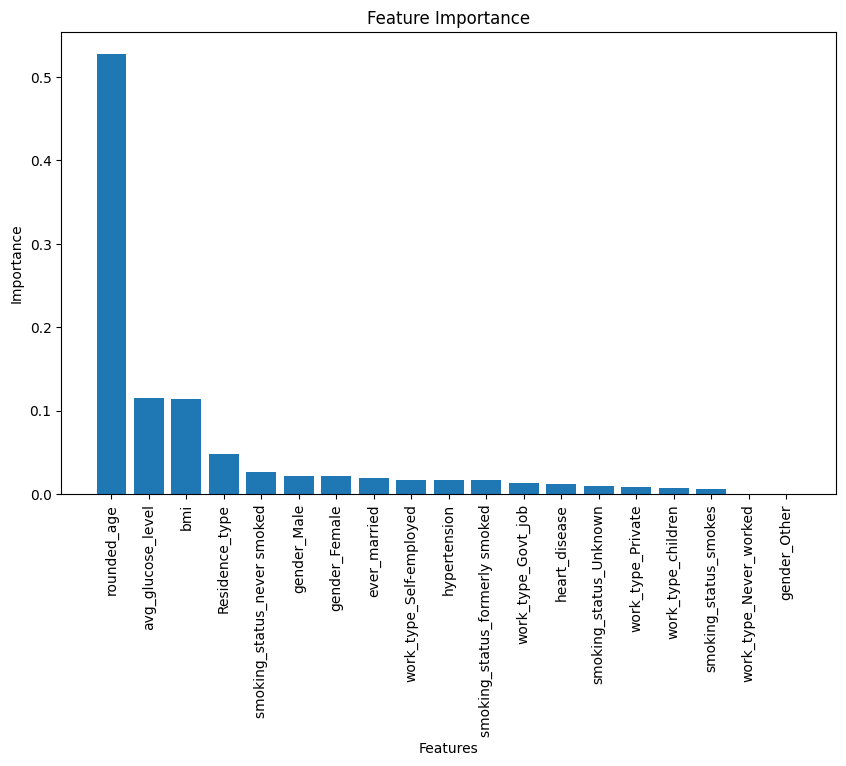

In [25]:

# Access the model from the training data
decision_tree_model = trained_models_SMOTE['Decision Tree']

# predict stroke
y_pred = decision_tree_model.predict(X_test_std)

# Calculate the probabilities
probabilities = decision_tree_model.predict_proba(X_test_std)

# Get the importance per featuer
features = decision_tree_model.feature_importances_
features

# Get indices of features sorted by their importance
sorted_indices = features.argsort()[::-1]

feature_names = X_test.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), features[sorted_indices], align='center')
plt.xticks(range(len(features)), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# Conclusion
 Comparing the models, we can argumetn the following:

- Random Forest: High overall cross-validation performance with a mean recall of 0.973 and F1 of 0.957, but lower recall (0.10) and F1 (0.11) in the test results, suggesting inconsistency in capturing all positive cases.

- Decision Tree: Offers a balanced performance with a mean recall of 0.915 and F1 of 0.900, and better test performance in terms of recall (0.26) and F1 (0.18), making it a more reliable option for capturing stroke cases.

- SVM: Lower recall (0.38) and F1 (0.17) in the test results, indicating it might miss significant positive stroke predictions.

- Logistic Regression: Similar limitations with a recall of 0.62 and F1 of 0.19 in the test results, showing some potential but not as balanced as Decision Tree.

The likelihood of a patient having a stroke based on various risk factors (gender, age, work type, BMI, glucose levels, or smoking status) can be effectively assessed using the Decision Tree model. This model offers a balanced approach, with a good recall and F1 score, indicating its ability to predict stroke occurrence by accurately identifying positive cases without many false negatives. Its structure allows for easy interpretation of how different risk factors contribute to the prediction, making it suitable for understanding the impact of individual risk factors on stroke likelihood.

At the end, we visualize which feature has the highest impact on a stroke occurance based on the our trained decision tree model - it appears that is the patient's age.

In conclusion, for the specific goal of minimizing missed stroke predictions (high recall) while still maintaining a reasonable level of precision and overall predictive accuracy, the Decision Tree model is our choice. Further investigation and tuning of the Random Forest model could also be beneficial, given its high potential indicated by cross-validation results but that is our of our project scope.

# Deviations from our submitted Preliminary Study

Overall we used the Preliminary study as a guidance through our project.
We followed our initial plan to oversample the dataset and excluded undersampling, since it not a common technique to apply after oversampling.
We focused on two metrics overall and excluded the accuracy, as argumented in the code.
We tried to answer the reaserach questions and we therefore had to reformulate the second one, from "Which machine learning methodologies demonstrate higher accuracy in predicting the likelihood
of stroke occurrence?" to "Which ML methodology is the most suitable one for predicting brain stroke among patients?", which is also the question we tried to answer at the end.

The EDA and StreamLit part also don't significantly deviate from the plan.